# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
import numpy as np
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = 43#len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.

import csv

# get sign names
f = open('signnames.csv', 'r')
reader = csv.reader(f)
signs_dict = dict(reader)
f.close()

In [4]:
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline
import random

def print_image_from_set(image, label):
    print('Class %i "%s"' % (label, signs_dict[str(label)]))
    fig = plt.figure(figsize = (1, 1))
    if image.shape[-1] == 1:
        plt.imshow(image.squeeze(), cmap = 'gray')
    else:
        plt.imshow(image)

def print_set_stats(X, y, show_pics = True, show_histogram = True, header = None):
    if header != None:
        print(header)
    u_id, u_indx, u_cnt = np.unique(y, return_index=True, return_counts=True)
    if show_pics:
        for id, indx, cnt in zip(u_id, u_indx, u_cnt):
            print('Class %i "%s" has %i samples' % (id, signs_dict[str(id)], cnt))
            fig = plt.figure(figsize = (6, 1))
            indx_sample = random.sample(range(indx, indx + cnt), 10)
            for i in range(10):

                axis = fig.add_subplot(1, 10, i + 1, xticks=[], yticks=[])
                if X[indx_sample[i]].shape[-1] == 1:
                    axis.imshow(X[indx_sample[i]].squeeze(), cmap = 'gray')
                else:
                    axis.imshow(X[indx_sample[i]])
            plt.show()
    if show_histogram:
        plt.bar(np.arange(n_classes), u_cnt)
        plt.xlabel('Class')
        plt.ylabel('Number of samples')
        plt.show()




In [ ]:
print_set_stats(X_train, y_train, True, True, 'Training data set stats')
#print_set_stats(X_test, y_test, True, True, '\nTest data set stats')

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [5]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

#???? do normalisation to 0-1 values?
#???? do image adjustments?

def rgb2gray(rgb):
    r, g, b = rgb[:,:,:,0], rgb[:,:,:,1], rgb[:,:,:,2]
    gray = np.rint(0.2989 * r + 0.5870 * g + 0.1140 * b)
    gray = gray.reshape(gray.shape + (1,)).astype(np.uint8) 
    return gray

def example_print(images, cmap = 'gray'):
    fig = plt.figure(figsize = (10, 1))
    count = len(images)
    for i in range(count):
        axis = fig.add_subplot(1, count, i + 1, xticks=[], yticks=[])
        axis.imshow(images[i].squeeze(), cmap=cmap)
    plt.show()

def image_adjust(images, use_CLAHE = False):
    if use_CLAHE:
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    for i in range(len(images)):
        if use_CLAHE:
            img = clahe.apply(images[i])
        else:
            img = cv2.equalizeHist(images[i])
        images[i] = img.reshape(img.shape + (1,)).astype(np.uint8) 

In [6]:
# DO TRAIN SET PREPROCESSING
def preprocess_dataset(images):
    images = rgb2gray(images)
    image_adjust(images, True)
    #Scale to 0..1
    images = (images / 255.).astype(np.float32)
    return images

X_train = preprocess_dataset(X_train)

In [ ]:
example_print(X_train[3450:3470,:,:,:])

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

In [7]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(
    X_train,
    y_train,
    test_size=0.2,
    random_state=435128)

In [ ]:
# show some of the images from train set
fig = plt.figure(figsize = (10, 1))
for i in range(20):
    axis = fig.add_subplot(1, 20, i + 1, xticks=[], yticks=[])
    axis.imshow(X_train[i].squeeze(), cmap = 'gray')

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

In [8]:
'''color_channel = 1
conv1_k = 5
conv1_f = 32
conv2_k = 5
conv2_f = 64
conv3_k = 3
conv3_f = 128
linear1_f = 300
linear2_f = n_classes
linear3_f = None'''

color_channel = 1
conv1_k = 7
conv1_f = 100
conv2_k = 4
conv2_f = 150
conv3_k = 4
conv3_f = 250
linear1_f = 300
linear2_f = n_classes
linear3_f = None

def file_namer():
    name = 'Signs_vars_conv_%i_%i' % (conv1_f, conv2_f)
    if conv3_f != None:
        name += '_' + str(conv3_f)
    name += '_linear' + str(linear1_f)
    if linear2_f != None:
        name += '_' + str(linear2_f)
    if linear3_f != None:
        name += '_' + str(linear3_f)
    name += '.dat'
    return name

In [10]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
from tensorflow.contrib.layers import flatten
import tensorflow as tf
import math

def maxpool2d(x, name, k=2):
    return tf.nn.max_pool(
        x,
        ksize=[1, k, k, 1],
        strides=[1, k, k, 1],
        padding='SAME',
        name=name)

def conv2d(x, W, b, name, stride=1):
    x = tf.nn.conv2d(x, W, strides=[1, stride, stride, 1], padding='VALID',name=name)
    x = tf.nn.bias_add(x, b)
    #x = tf.nn.sigmoid(x)
    #x = tf.nn.relu(x)
    #x = tf.nn.tanh(x)
    return x

def linear(x, W, b, name):
    x = tf.add(tf.matmul(x, W), b, name=name+'_add')
    #x = tf.nn.sigmoid(x)
    #x = tf.nn.relu(x, name=name+'_relu')
    #x = tf.nn.tanh(x)
    return x

# Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
mu = 0
sigma = 0.1
w_and_b = {
    'wconv1': tf.Variable(tf.truncated_normal([conv1_k, conv1_k, color_channel, conv1_f], mean=mu, stddev=sigma), name='wconv1'),
    'wconv2': tf.Variable(tf.truncated_normal([conv2_k, conv2_k, conv1_f, conv2_f], mean=mu, stddev=sigma), name='wconv2'),
    'wconv3': tf.Variable(tf.truncated_normal([conv3_k, conv3_k, conv2_f, conv3_f], mean=mu, stddev=sigma), name='wconv3'),
    'wlinear1': tf.Variable(tf.truncated_normal([250, linear1_f], mean=mu, stddev=sigma), name='wlinear1'),
    #'wlinear2': tf.Variable(tf.truncated_normal([linear1_out, linear2_out], mean=mu, stddev=sigma), name='wlinear2'),
    'wout': tf.Variable(tf.truncated_normal([linear1_f, n_classes], mean=mu, stddev=sigma), name='wout'),
    # BIASES
    'bconv1': tf.Variable(tf.zeros([conv1_f]), name='bconv1'),
    'bconv2': tf.Variable(tf.zeros([conv2_f]), name='bconv2'),
    'bconv3': tf.Variable(tf.zeros([conv3_f]), name='bconv3'),
    'blinear1': tf.Variable(tf.zeros([linear1_f]), name='blinear1'),
    #'blinear2': tf.Variable(tf.zeros([linear2_f]), name='blinear2'),
    'bout': tf.Variable(tf.zeros([n_classes]), name='bout')}
keep_prob = tf.placeholder(tf.float32)

def SignsClassifierNN(x):    

    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x100.
    layer1 = conv2d(x, w_and_b['wconv1'], w_and_b['bconv1'], name='L1_Conv')
    #   Pooling. Input = 28x28x100. Output = 14x14x100.
    layer1 = maxpool2d(layer1, name='L1_MPool')
    layer1 = tf.nn.relu(layer1)
                       
    # Layer 2: Convolutional. Output = 9x9x100.
    layer2 = conv2d(layer1, w_and_b['wconv2'], w_and_b['bconv2'], name='L2_Conv')
    #    Pooling. Input = 9x9x100. Output = 5x5x150.
    layer2 = maxpool2d(layer2, name='L2_MPool')
    layer2 = tf.nn.relu(layer2)
    
    # Layer 3: Convolutional. kernel = 4x4. Output = 150.
    layer3 = conv2d(layer2, w_and_b['wconv3'], w_and_b['bconv3'], name='L3_Conv')
    #     Input = 2x2x128. Output = 1x1.
    layer3 = maxpool2d(layer3, name = 'L3_MPool')
    layer3 = tf.nn.relu(layer3)
    
    layerf = tf.contrib.layers.flatten(layer3)
    ###layerf = tf.nn.relu(layerf)
    
    #DROPOUT
    
    fc1_drop = tf.nn.dropout(layerf, keep_prob)    
    
    # Fully Connected. Input = 1600. Output = 160.
    linear1 = linear(fc1_drop, w_and_b['wlinear1'], w_and_b['blinear1'], name='L1_Linear')
    linear1 = tf.nn.relu(linear1)
    
    # Fully Connected. Input = 160. Output = 86.
    #layer4 = linear(layer3, w_and_b['wl4'], w_and_b['bl4'], name='L2_Linear')
    
    #DROPOUT
    #keep_prob = tf.placeholder(tf.float32)
    #fc1_drop = tf.nn.dropout(linear1, keep_prob)
                       
    # Layer 5: Fully Connected. Input = 86. Output = n_classes = 43.
    logits = linear(linear1 , w_and_b['wout'], w_and_b['bout'], name='LOut_Linear')
                       
    return logits

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

In [11]:
### Train your model here.
### Feel free to use as many code cells as needed.

EPOCHS = 10
BATCH_SIZE = 128 #256 #128

x = tf.placeholder(tf.float32, (None, 32, 32, color_channel))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

# Training Pipeline
rate = 0.001

logits = SignsClassifierNN(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy) + 0.0001*tf.nn.l2_loss(w_and_b['wlinear1'])  + 0.0001*tf.nn.l2_loss(w_and_b['wout'])
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

# Evaluation model
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

predictions = tf.nn.softmax(logits)
top_k_predictions = tf.nn.top_k(predictions, 3)

def get_top_k_predictions(X):
    sess = tf.get_default_session()
    p = sess.run(top_k_predictions, feed_dict = {x: X, keep_prob: 1.0})
    return np.array(p)

In [13]:
# TRAINing module
from sklearn.utils import shuffle

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    #saver.restore(sess, tf.train.latest_checkpoint('.'))
    #saver.restore(sess, 'D:\_study\SDC\Code\CarND-Traffic-Sign-Classifier-Project\signs_classifier_vars_conv_32_64_128_lr_300_0')
    num_examples = len(X_train)
    print("Training on %i examples" % (num_examples) )
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        train_accuracy = evaluate(X_train, y_train)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print("Train Accuracy = {:.3f}".format(train_accuracy))
        print()
        
    saver.save(sess, 'D:\_study\SDC\Code\CarND-Traffic-Sign-Classifier-Project\signs_classifier_vars_conv_x3.dat')
    print("Model saved")

Training on 31367 examples
EPOCH 1 ...
Validation Accuracy = 0.824
Train Accuracy = 0.836

EPOCH 2 ...
Validation Accuracy = 0.937
Train Accuracy = 0.949

EPOCH 3 ...
Validation Accuracy = 0.971
Train Accuracy = 0.982

EPOCH 4 ...
Validation Accuracy = 0.978
Train Accuracy = 0.988

EPOCH 5 ...
Validation Accuracy = 0.981
Train Accuracy = 0.991

EPOCH 6 ...
Validation Accuracy = 0.988
Train Accuracy = 0.997

EPOCH 7 ...
Validation Accuracy = 0.988
Train Accuracy = 0.996

EPOCH 8 ...
Validation Accuracy = 0.982
Train Accuracy = 0.993

EPOCH 9 ...
Validation Accuracy = 0.990
Train Accuracy = 0.998

EPOCH 10 ...
Validation Accuracy = 0.991
Train Accuracy = 0.999

Model saved


In [14]:
# Test model
print('Test model on test set')
# do test set processing
X_test_gr = preprocess_dataset(X_test)


with tf.Session() as sess:
    #saver.restore(sess, 'D:\_study\SDC\Code\CarND-Traffic-Sign-Classifier-Project\signs_classifier_vars_conv_32_64_128_lr_300_0')
    #saver.restore(sess, 'D:\_study\SDC\Code\CarND-Traffic-Sign-Classifier-Project\signs_classifier_vars_conv3.dat')
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_accuracy = evaluate(X_test_gr, y_test)
    print('Test accuracy = {:.3f}'.format(test_accuracy))
    print()

Test model on test set
Test accuracy = 0.963



In [ ]:
#check trained net output on random items
graph = tf.Graph()
with graph.as_default():
    x_test_v = tf.placeholder(tf.float32, shape = (None, 32, 32, color_channel))
    predictions = tf.argmax(SignsClassifierNN(x_test_v), 1)
    with tf.Session(graph = graph) as sess:
        sess.run(tf.global_variables_initializer())
        tf.train.Saver().restore(sess,  'D:\_study\SDC\Code\CarND-Traffic-Sign-Classifier-Project\signs_classifier_vars_conv3.dat')
        predicted = sess.run(predictions, feed_dict = {x_test_v: X_test_gr[0:10]})

        for i in range(len(predicted)):
            print('Predicted sign class #%i "%s"' % (predicted[i], signs_dict[str(predicted[i])]))
            print('Actual sign class #%i "%s"' % (y_test[i], signs_dict[str(y_test[i])]))
            #plt.imshow(X_test_gr[i].squeeze(), cmap = 'gray')
#y = tf.placeholder(tf.int32, (None))
#one_hot_y = tf.one_hot(y, n_classes)

In [15]:
# evaluate what samples were guessed wrong
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    predictions = get_top_k_predictions(X_test_gr)
#print(predictions[0:10])

In [16]:
#print(pr[0:4])
print(predictions[0][0])

print(predictions[1][0])
print(predictions[1][1])

[  9.99999881e-01   1.38412304e-07   6.41088294e-09]
[ 16.   9.  10.]
[ 1.  0.  5.]


In [ ]:
print(np.max(predictions[0][0]))
print(np.argmax(predictions[0][0]))

Top incorrect predictions


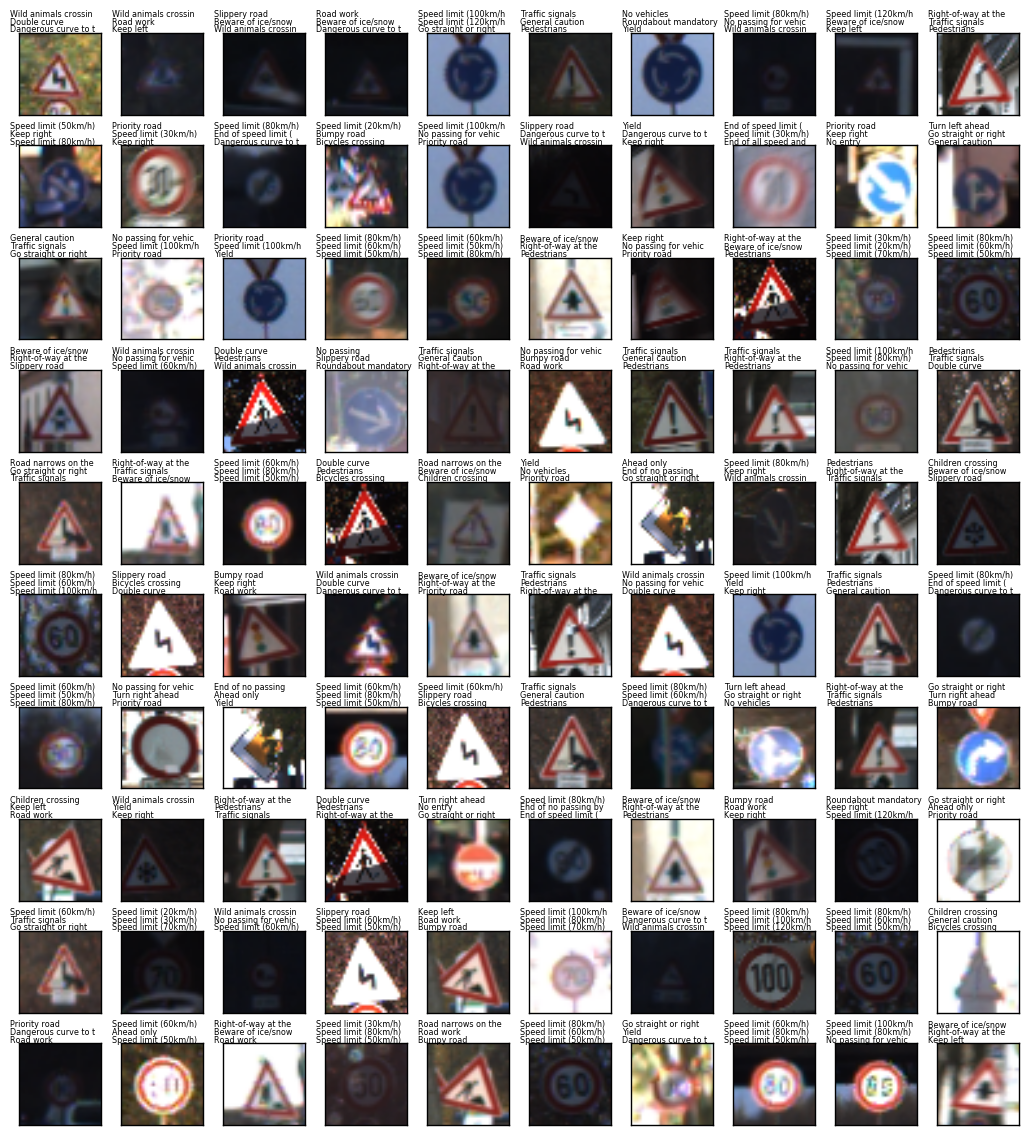

In [18]:
print('Top incorrect predictions')
MAX_WRONG_EXAMPLES_DISPLAY = 100

#predicted classes predictions[1,:,0].astype(int)
#predictions[0] chances top k
#predictions[1] labels top k
guessed_wrong_filter = y_test != predictions[1,:,0].astype(int)
prediction_top_k_labels = predictions[1,:,:].astype(int)[guessed_wrong_filter]
test_imgs_guessed_wrong = X_test[guessed_wrong_filter]
test_lbls_guessed_wrong = y_test[guessed_wrong_filter]

fig = plt.figure(figsize = (10, 10))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1.1, hspace=0.25, wspace=0.25)
for i in range(np.minimum(MAX_WRONG_EXAMPLES_DISPLAY, len(test_lbls_guessed_wrong))):
    axis = fig.add_subplot(10, 10, i + 1, xticks=[], yticks=[])#, title = "Testzzzzzzzzzzz" + str(test_lbls_guessed_wrong[i]))    
    #axis.set_label_text("Test %s" % (test_lbls_guessed_wrong[i]) )
    axis.imshow(test_imgs_guessed_wrong[i].squeeze(), cmap = 'gray')
    axis.text(-4,-7,signs_dict[str(prediction_top_k_labels[i,0])][0:20], size ='xx-small')
    axis.text(-4,-4,signs_dict[str(prediction_top_k_labels[i,1])][0:20], size ='xx-small')
    axis.text(-4,-1,signs_dict[str(prediction_top_k_labels[i,2])][0:20], size ='xx-small')

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

In [ ]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

In [ ]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.